In [ ]:
# Created: 20250104

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: py311; pyv: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


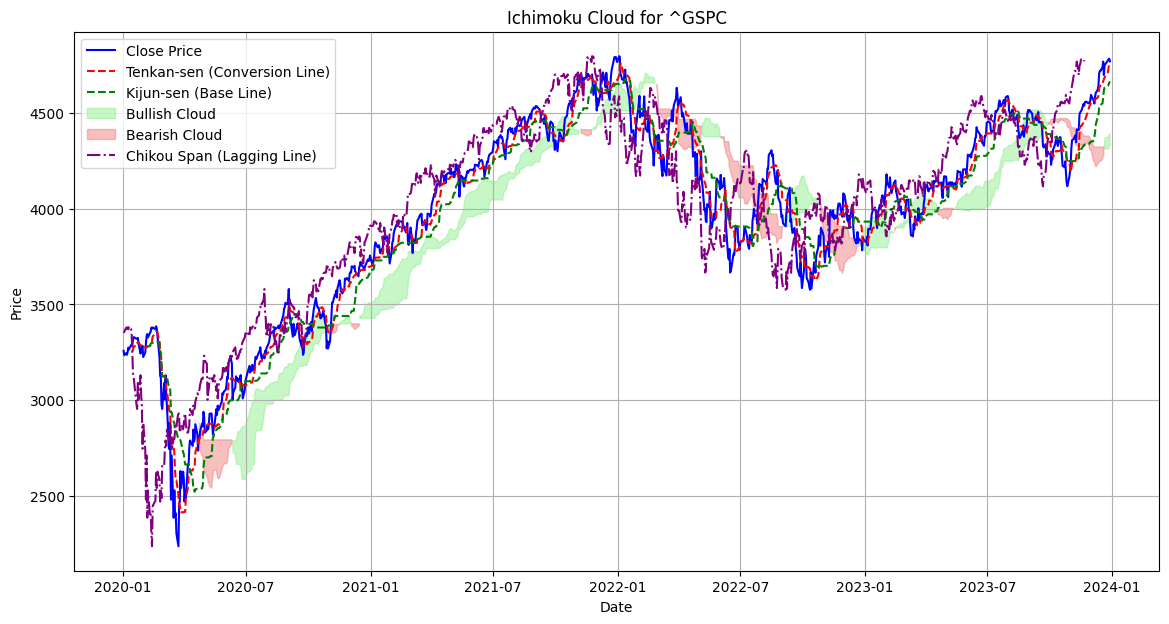

In [5]:

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)# Step 2: Calculate Ichimoku Cloud components

def ichimoku_cloud(data):
    # Conversion Line (Tenkan-sen): (9-period high + 9-period low) / 2
    data['Tenkan-sen'] = (data['High'].rolling(window=9).max() + data['Low'].rolling(window=9).min()) / 2
    
    # Base Line (Kijun-sen): (26-period high + 26-period low) / 2
    data['Kijun-sen'] = (data['High'].rolling(window=26).max() + data['Low'].rolling(window=26).min()) / 2
    
    # Leading Span A (Senkou Span A): (Tenkan-sen + Kijun-sen) / 2
    data['Senkou Span A'] = ((data['Tenkan-sen'] + data['Kijun-sen']) / 2).shift(26)
    
    # Leading Span B (Senkou Span B): (52-period high + 52-period low) / 2
    data['Senkou Span B'] = (data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2
    data['Senkou Span B'] = data['Senkou Span B'].shift(26)
    
    # Lagging Span (Chikou Span): Close price shifted 26 periods back
    data['Chikou Span'] = data['Close'].shift(-26)
    
    return data

# Apply Ichimoku Cloud calculation
data = ichimoku_cloud(data)

# Step 3: Plot the Ichimoku Cloud
plt.figure(figsize=(14, 7))

# Plot Close Price
plt.plot(data['Close'], label='Close Price', color='blue')

# Plot Tenkan-sen and Kijun-sen
plt.plot(data['Tenkan-sen'], label='Tenkan-sen (Conversion Line)', color='red', linestyle='--')
plt.plot(data['Kijun-sen'], label='Kijun-sen (Base Line)', color='green', linestyle='--')

# Fill the cloud (Senkou Span A and B)
plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], 
                 where=data['Senkou Span A'] >= data['Senkou Span B'], 
                 color='lightgreen', alpha=0.5, label='Bullish Cloud')
plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], 
                 where=data['Senkou Span A'] < data['Senkou Span B'], 
                 color='lightcoral', alpha=0.5, label='Bearish Cloud')

# Plot Chikou Span
plt.plot(data['Chikou Span'], label='Chikou Span (Lagging Line)', color='purple', linestyle='-.')

# Customize the plot
plt.title(f'Ichimoku Cloud for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()